In [1]:
import os

In [2]:
train_horse_dir = os.path.join('/media/midhun/LOCAL_DISK/Programming/deep learning/coursera/horse-or-human/horses')
train_human_dir = os.path.join('/media/midhun/LOCAL_DISK/Programming/deep learning/coursera/horse-or-human/humans')

In [3]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


### Total number of images in the directory

In [4]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0

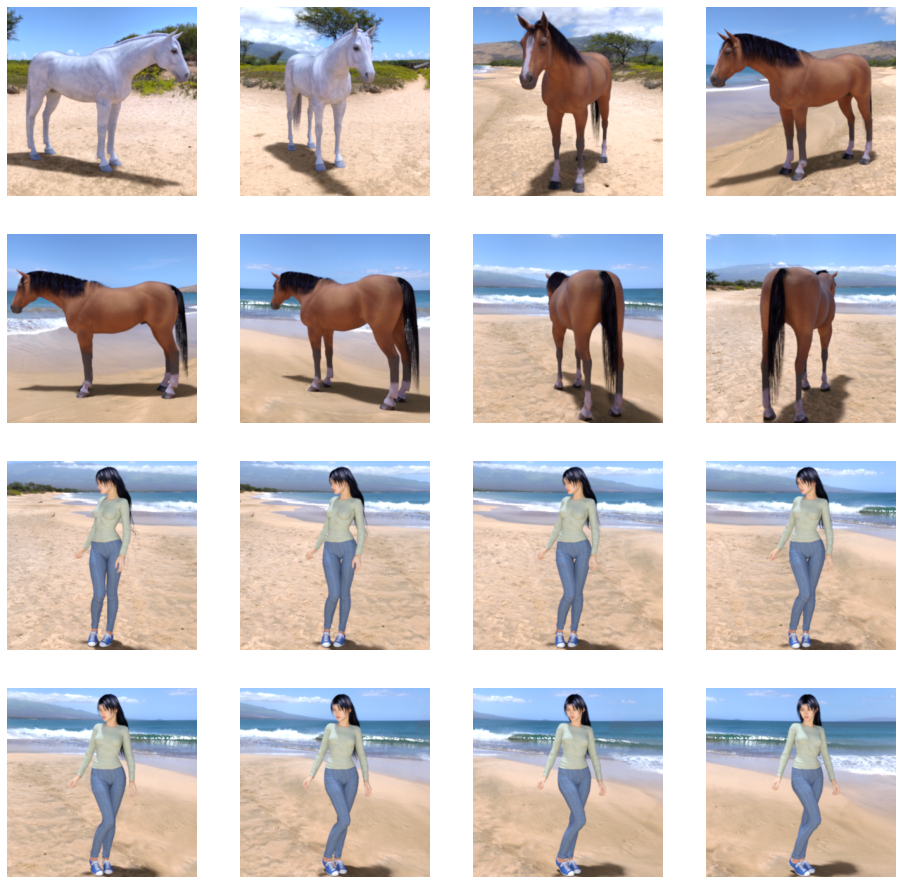

In [19]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [7]:
import tensorflow as tf

### Pre Processing the images and scaling them to 300*300

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/media/midhun/LOCAL_DISK/Programming/deep learning/coursera/horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                        ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

### Compile the model

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Training the model

In [12]:
history = model.fit(
                      train_generator,
                      steps_per_epoch=8,  
                      epochs=15,
                      verbose=1
                    )

Epoch 1/15
8/8 [==============================] - 40s 5s/step - loss: 0.9930 - accuracy: 0.5495
Epoch 2/15
8/8 [==============================] - 38s 5s/step - loss: 0.5985 - accuracy: 0.6897
Epoch 3/15
8/8 [==============================] - 43s 5s/step - loss: 0.6762 - accuracy: 0.7442
Epoch 4/15
8/8 [==============================] - 42s 5s/step - loss: 0.3049 - accuracy: 0.8888
Epoch 5/15
8/8 [==============================] - 42s 5s/step - loss: 0.6769 - accuracy: 0.7953
Epoch 6/15
8/8 [==============================] - 38s 5s/step - loss: 0.1648 - accuracy: 0.9344
Epoch 7/15
8/8 [==============================] - 38s 5s/step - loss: 0.0845 - accuracy: 0.9655
Epoch 8/15
8/8 [==============================] - 47s 6s/step - loss: 0.1438 - accuracy: 0.9444
Epoch 9/15
8/8 [==============================] - 48s 6s/step - loss: 0.0269 - accuracy: 0.9900
Epoch 10/15
8/8 [==============================] - 48s 6s/step - loss: 0.2922 - accuracy: 0.9344
Epoch 11/15
8/8 [======================

### Running the model

In [17]:
import numpy as np
from keras.preprocessing import image

path = '/media/midhun/LOCAL_DISK/Programming/deep learning/coursera/beauty-1462986_640.jpg'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(" is a human")
else:
    print(" is a horse")

[1.]
 is a human
